In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data

In [65]:
#plot 1: average price by zip code
avePriceByZipCode = data.loc[:,['price','zipcode']].groupby(['zipcode'], axis=0).median()
avePriceByZipCode['zipcode'] = avePriceByZipCode.index
avePriceByZipCode.index.name = 'index'

In [66]:
avePriceByZipCodeS = avePriceByZipCode.sort_values('price', axis=0)

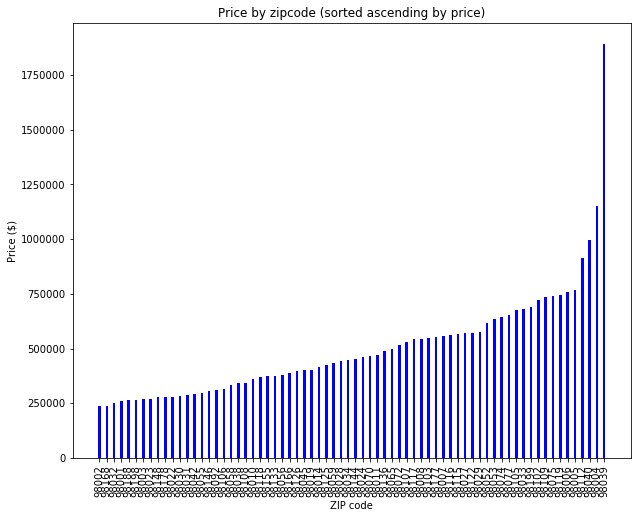

In [67]:
plt.figure(figsize=(10,8))
y1 = avePriceByZipCodeS['price'].values.astype(float)
zipcodes = avePriceByZipCodeS['zipcode'].values
inds = np.arange(y1.shape[0])
width = 0.35
plt.bar(inds, y1, width,color='b')
plt.title('Price by zipcode (sorted ascending by price)')
plt.xlabel('ZIP code')
plt.ylabel('Price ($)')
plt.xticks(inds,zipcodes, rotation = 90)
plt.show()

In [ ]:
# Questions:
# what explains the difference between the 2 top zipcodes? 
# is there a difference between houses in top 2 zip codes when we adjust for average price, square footage, floors, quality, etc.
# is there something beyond land/value that explains the difference

In [ ]:
# Let's explore some the top 2 zip codes a bit

In [68]:
zip1str = 98004
zip2str = 98039

In [74]:
values = avePriceByZipCodeS.loc[[zip1str, zip2str],'price'].values
moreExpensiveBy = 100.*(values[1]/values[0]-1)
print('Zipcode {} is more expensive than zipcode {} by {}% (median prices)'.format(zip2str, zip1str, moreExpensiveBy))

Zipcode 98039 is more expensive than zipcode 98004 by 64.56521739130434% (median prices)


In [18]:
zip1data = data[data['zipcode']==zip1str]

In [75]:
topZipCodes = data[(data['zipcode']==zip1str) | (data['zipcode']==zip2str) ]

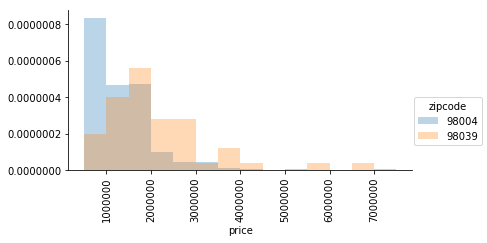

In [76]:
# let's see the histogram of the price by zipcode
g = sns.FacetGrid(topZipCodes, hue="zipcode", aspect=2)
bins = np.arange(500000, 8000000,500000)
g = (g.map(plt.hist, "price",bins = bins, normed=True, stacked=True, alpha=0.3).add_legend())
plt.xticks(rotation=90)
plt.show()

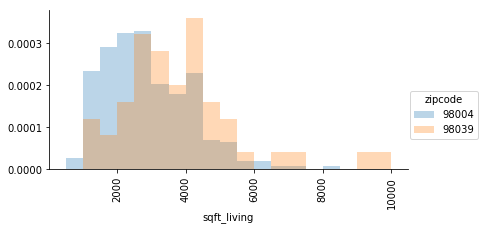

In [77]:
# let's see the histogram of the square footage by zipcode
g = sns.FacetGrid(topZipCodes, hue="zipcode", aspect=2)
bins = np.arange(500,10500,500)
g = (g.map(plt.hist, "sqft_living", bins=bins, normed=True, stacked=True, alpha=0.3).add_legend())
plt.xticks(rotation=90)
plt.show()

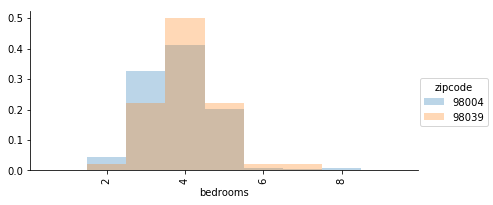

In [78]:
# let's see the histogram of the bedrooms by zipcode
g = sns.FacetGrid(topZipCodes, hue="zipcode", aspect=2)
bins = np.arange(0.5,10.5,1)
g = (g.map(plt.hist, "bedrooms", bins=bins, normed=True, stacked=True, alpha=0.3).add_legend())
plt.xticks(rotation=90)
plt.show()

In [89]:
topZipCodes2 = topZipCodes.copy()
topZipCodes2['yr_built_renov'] = topZipCodes[['yr_built','yr_renovated']].max(axis=1)

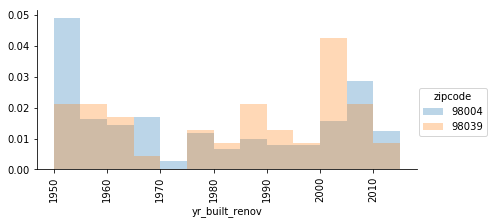

In [92]:
# let's see the histogram of the age by zipcode
g = sns.FacetGrid(topZipCodes, hue="zipcode", aspect=2)
bins = np.arange(1950,2020,5)
g = (g.map(plt.hist, "yr_built_renov", bins=bins, normed=True, stacked=True, alpha=0.3).add_legend())
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The houses in zip code 98039 seem to be a bit bigger and newer than the houses in zip code 98004

In [109]:
topZipCodes3 = topZipCodes2.copy()
# topZipCodes3['bathrooms_int'] = topZipCodes3['bathrooms'].apply(np.floor).astype(int)
topZipCodes3['bathrooms_int'] = topZipCodes3['bathrooms'].apply(lambda x: min(np.floor(x),4)).astype(int)
topZipCodes3['bedrooms_5'] = topZipCodes3['bedrooms'].apply(lambda x: min(np.floor(x),5)).astype(int)

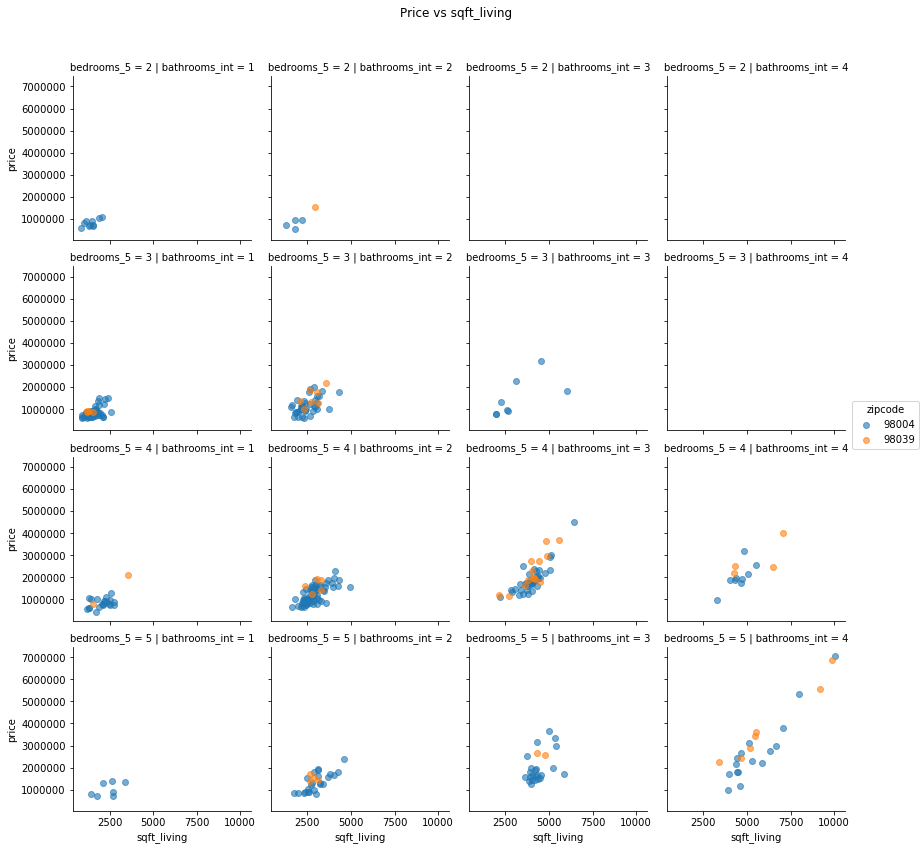

In [118]:
# let's see a scatter plot
g = sns.FacetGrid(topZipCodes3,row='bedrooms_5', col='bathrooms_int', hue="zipcode", aspect=1)
g = (g.map(plt.scatter, "sqft_living",'price', alpha=0.6).add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price vs sqft_living') # can also get the figure from plt.gcf()
plt.show()

In [ ]:
# the plot above seems to suggest that once you control for size of the house the prices are the same (or almost the same)

# Experimentation RFC

Hypothesis: prices in zipcode 98039 are very similar to the ones in zipcode 98004 once we control for size (bedrooms, bathrooms and square footage)

Plan: fit a linear regression model of price on sqft_living for each combination of (bedrooms, bathrooms) that has more than 10 houses in zipcode 98004

Evaluation: check whether the deviations of 98039 from the fitted model are not in the tail of the distribution of the erros of the 98004 models (one for each group) 

Some comments:
1. The models in 98004 are not great because there aren't that many houses in each subgroup. But there seem to be enough to get a basic estimate.
2. I would also consider some alternatives. For example I would throw in regressions also the age of the building (adjusted for renovation) and the sqft_lot. See below for scatter plots of the price vs sqft_lot rather than sqft_living.  

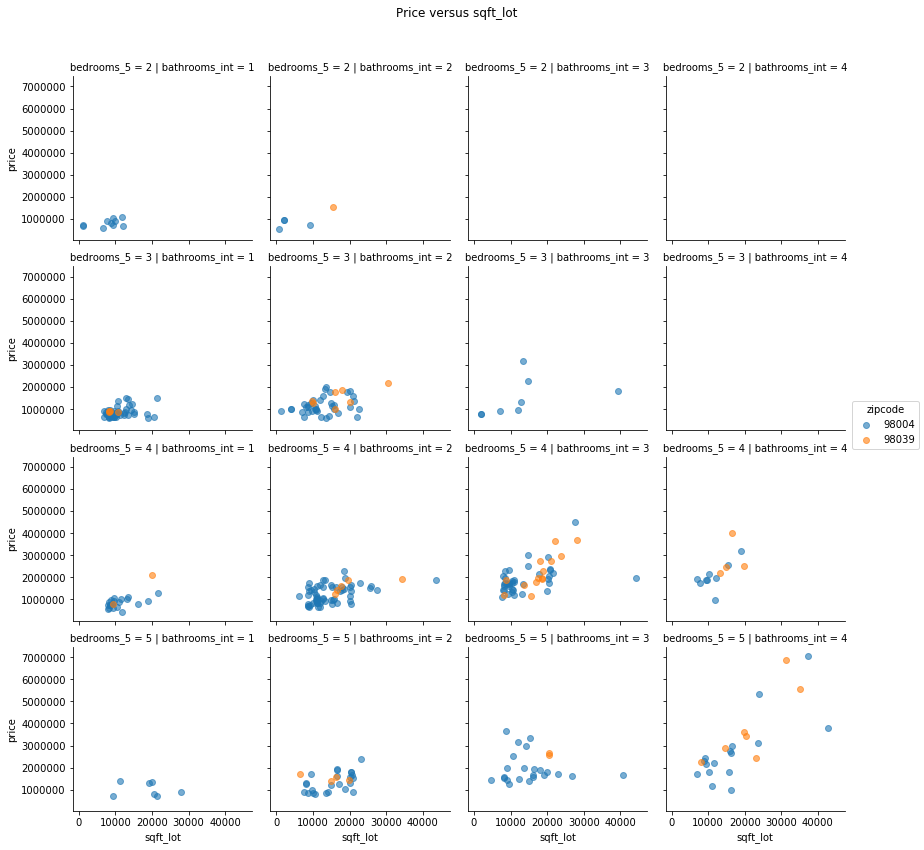

In [117]:
# let's see a scatter plot
g = sns.FacetGrid(topZipCodes3,row='bedrooms_5', col='bathrooms_int', hue="zipcode", aspect=1)
g = (g.map(plt.scatter, "sqft_lot",'price', alpha=0.6).add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price versus sqft_lot') # can also get the figure from plt.gcf()
plt.show()
